In [1]:
from pathlib import Path
import torch
from matplotlib import pyplot as plt
import numpy as np
from sainomore.data import occurences
from sainomore.xai import ElissabethWatcher, get_alphabet_projection

from main import build_model

In [ ]:
model_id = "kukzl2q4"

In [ ]:
watcher = ElissabethWatcher.load(model_id, on_cpu=True)

In [2]:
watcher = ElissabethWatcher(build_model().model)

## Model based

In [ ]:
fig, ax = watcher.plot_alphabet_projection(
    q=False,
    k=False,
    v=True,
    transpose=False,
    reduce_dims={0: 0},
    figsize=(70, 20),
)
# fig.savefig(
#     f"copying_values_{model_id}.pdf",
#     facecolor=(0, 0, 0, 0),
#     bbox_inches="tight",
# )

In [ ]:
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.levels.0.weightings.0.P_Q.transform.0.weight",
    figsize=(10, 5),
)
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.levels.0.weightings.0.P_Q.transform.2.weight",
    # log_cmap=(0.1, 1.0),
    figsize=(10, 5),
)

In [ ]:
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.W_H",
    # reduce_dims={2: 0},
    # append_dims=(0,1,),
    figsize=(10, 10),
)
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.W_O",
    reduce_dims={2: 0},
    append_dims=(0,1,),
    figsize=(10, 10),
)

In [ ]:
fig, ax = watcher.plot_parameter_matrix(
    "unembedding.weight",
    figsize=(10, 10),
)

In [ ]:
fig, ax = watcher.plot_qkv_probing(
    which="q",
    layer=0,
    length=0,
    weighting=0,
    reduce_dims={2: 0},
    append_dims=(2,),
    figsize=(25, 2),
)

In [ ]:
fig, ax = watcher.plot_qkv_probing(
    which="k",
    layer=0,
    length=0,
    weighting=0,
    reduce_dims={2: 0},
    append_dims=(2,),
    figsize=(20, 5),
)

In [ ]:
fig, ax = watcher.plot_qkv_probing(
    which="v",
    layer=0,
    length=0,
    weighting=0,
    reduce_dims={2: 0},
    append_dims=(2, ),
    figsize=(20, 5),
)

In [ ]:
import json
with open("quotes.txt", encoding="utf-8") as f:
    file = f.readlines()
lengths = []
for line in file:
    lengths.append(len(line))
np.mean(lengths)

## Example based

In [24]:
x, y = occurences(
    1,
    length=1000,
    characters=5,
    occurences=4,
    allow_higher=False,
)
x, y

(tensor([[3, 1, 4, 1, 4, 4, 3, 1, 0, 0, 1, 1, 4, 3, 4, 3, 1, 3, 0, 1, 4, 3, 4, 4,
          3, 4, 3, 4, 3, 1, 3, 0, 4, 0, 0, 3, 0, 3, 3, 0, 1, 4, 4, 4, 3, 0, 1, 0,
          3, 3, 0, 4, 0, 0, 4, 0, 4, 1, 4, 4, 1, 4, 1, 3, 0, 0, 3, 3, 4, 4, 3, 0,
          0, 4, 3, 4, 3, 4, 3, 0, 0, 0, 0, 0, 0, 4, 3, 1, 4, 3, 0, 1, 3, 3, 3, 3,
          4, 0, 4, 0, 4, 1, 1, 3, 1, 4, 4, 1, 4, 1, 1, 3, 3, 4, 4, 1, 1, 3, 0, 3,
          0, 4, 1, 0, 4, 4, 3, 1, 1, 4, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 1,
          4, 1, 3, 0, 4, 4, 4, 1, 3, 4, 3, 0, 3, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 3,
          3, 0, 4, 4, 1, 1, 1, 4, 1, 3, 0, 4, 3, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
          1, 0, 4, 1, 1, 3, 0, 0, 3, 1, 4, 4, 3, 1, 1, 4, 1, 4, 0, 0, 0, 4, 1, 4,
          3, 0, 0, 4, 1, 4, 0, 4, 4, 1, 0, 4, 4, 1, 3, 3, 1, 4, 3, 1, 3, 3, 0, 0,
          3, 1, 0, 3, 4, 1, 3, 4, 0, 4, 1, 1, 0, 1, 0, 0, 1, 4, 0, 0, 4, 0, 4, 0,
          3, 4, 4, 1, 0, 3, 3, 0, 4, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 1, 1, 1, 0, 4,
          4, 0, 

In [30]:
from sainomore.xai import get_iss, get_query_key

iss = get_iss(watcher.model, x[0])
iss[0, :, -1]

tensor([0., 0., 0., 0., 0.])

In [26]:
q1, k1 = get_query_key(watcher.model, x[0])

In [77]:
torch.cos(torch.tensor(torch.pi / 2, dtype=torch.float32))

tensor(-4.3711e-08)

In [78]:
torch.cos(torch.tensor(1.5708))

tensor(-3.6200e-06)

In [73]:
watcher.model.get_parameter("layers.0.levels.0.weightings.0.P_Q.transform.weight")

Parameter containing:
tensor([[0.0000, 1.5708, 0.0000, 0.0000, 1.5708],
        [0.0000, 0.0000, 1.5708, 0.0000, 1.5708],
        [0.0000, 0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 1.5708, 0.0000, 0.0000, 1.5708],
        [0.0000, 0.0000, 1.5708, 0.0000, 1.5708],
        [0.0000, 0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 1.5708, 0.0000, 0.0000, 1.5708],
        [0.0000, 0.0000, 1.5708, 0.0000, 1.5708],
        [0.0000, 0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 1.5708, 0.0000, 0.0000, 1.5708],
        [0.0000, 0.0000, 1.5708, 0.0000, 1.5708],
        [0.0000, 0.0000, 0.0000, 1.5708, 0.0000]])

In [31]:
q1[0, 0].T

tensor([[0.0000, 0.0000, 1.5708],
        [1.5708, 0.0000, 0.0000],
        [1.5708, 1.5708, 0.0000],
        ...,
        [1.5708, 0.0000, 0.0000],
        [1.5708, 0.0000, 0.0000],
        [0.0000, 1.5708, 0.0000]])

In [333]:
torch.testing.assert_close(q, q1)
torch.testing.assert_close(k, k1)

AssertionError: Tensor-likes are not close!

Mismatched elements: 44 / 180 (24.4%)
Greatest absolute difference: 1.5707963705062866 at index (0, 0, 0, 0) (up to 1e-05 allowed)
Greatest relative difference: inf at index (0, 0, 0, 0) (up to 1.3e-06 allowed)

In [ ]:
for i in range(15):
    iss += np.cos()

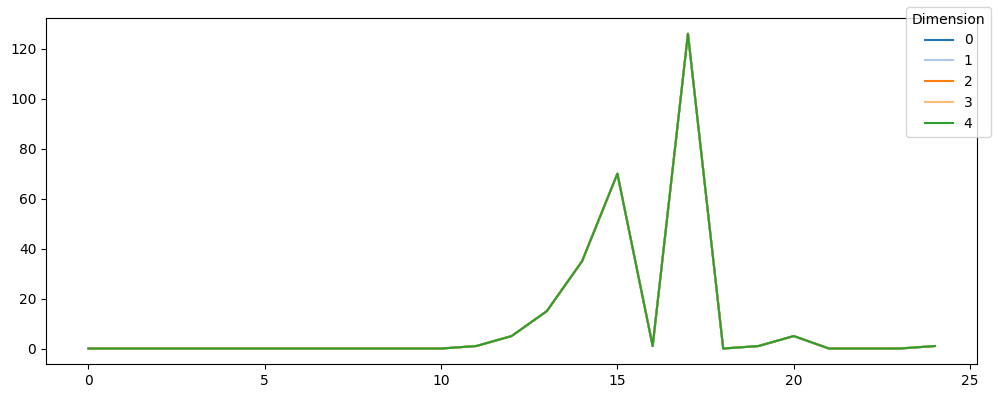

In [110]:
fig, ax = watcher.plot_iss_time(
    x[0],
    # x_axis=watcher.model(x).argmax(-1)[0, :],
    # reduce_dims={1: 0},
    append_dims=(1, ),
    # index_selection=((-1, torch.tensor((98, 99))), ),
    project_heads=False,
    project_values=False,
    figsize=(10, 4),
)
# fig, ax = watcher.plot_iss(
#     x[0],
#     append_dims=(1, ),
#     project_heads=True,
#     project_values=False,
#     figsize=(20, 20),
# )

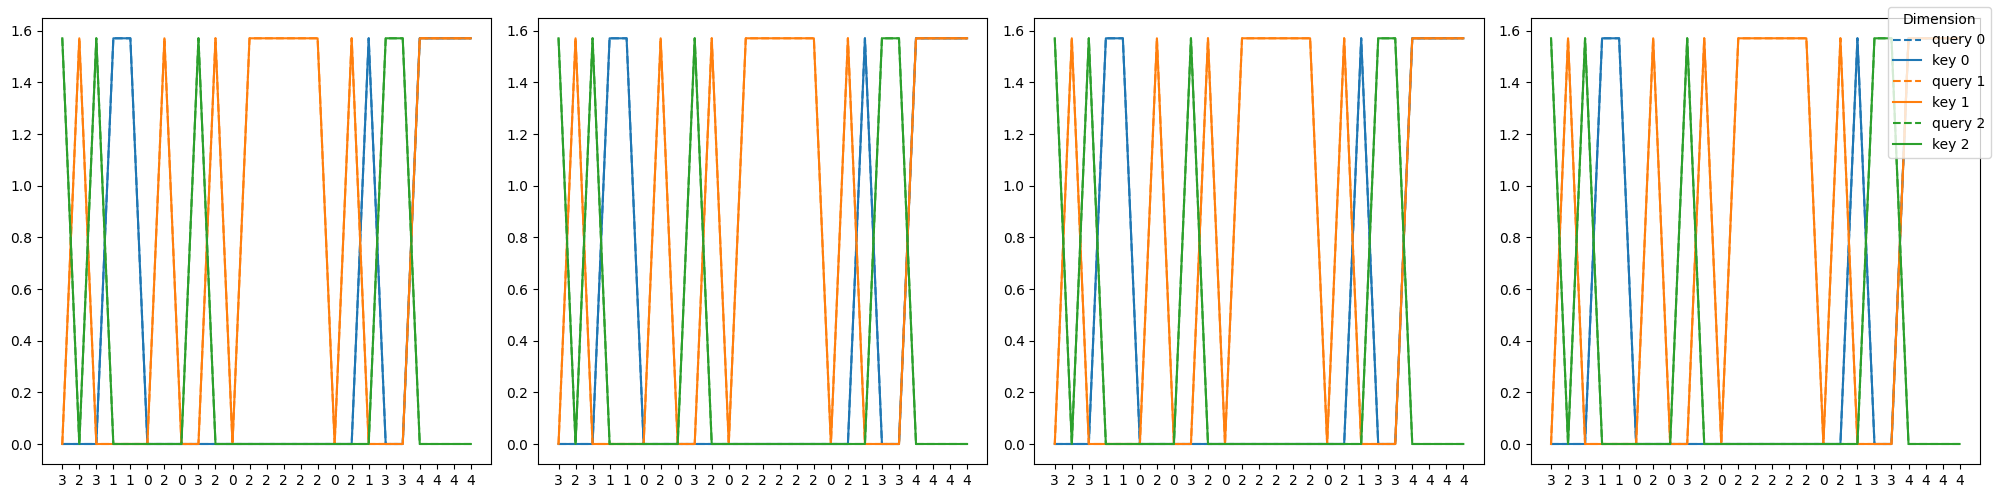

In [109]:
fig, ax = watcher.plot_query_key_time(
    x[0],
    x_axis=x[0],
    weighting=0,
    names=("query", "key"),
    cmap="tab10",
    # x_axis=x[0],
    project_heads=False,#tuple(torch.where(W_H.abs()[0] > 5)[0].numpy()),
    reduce_dims={0: 0},
    figsize=(20, 5),
)

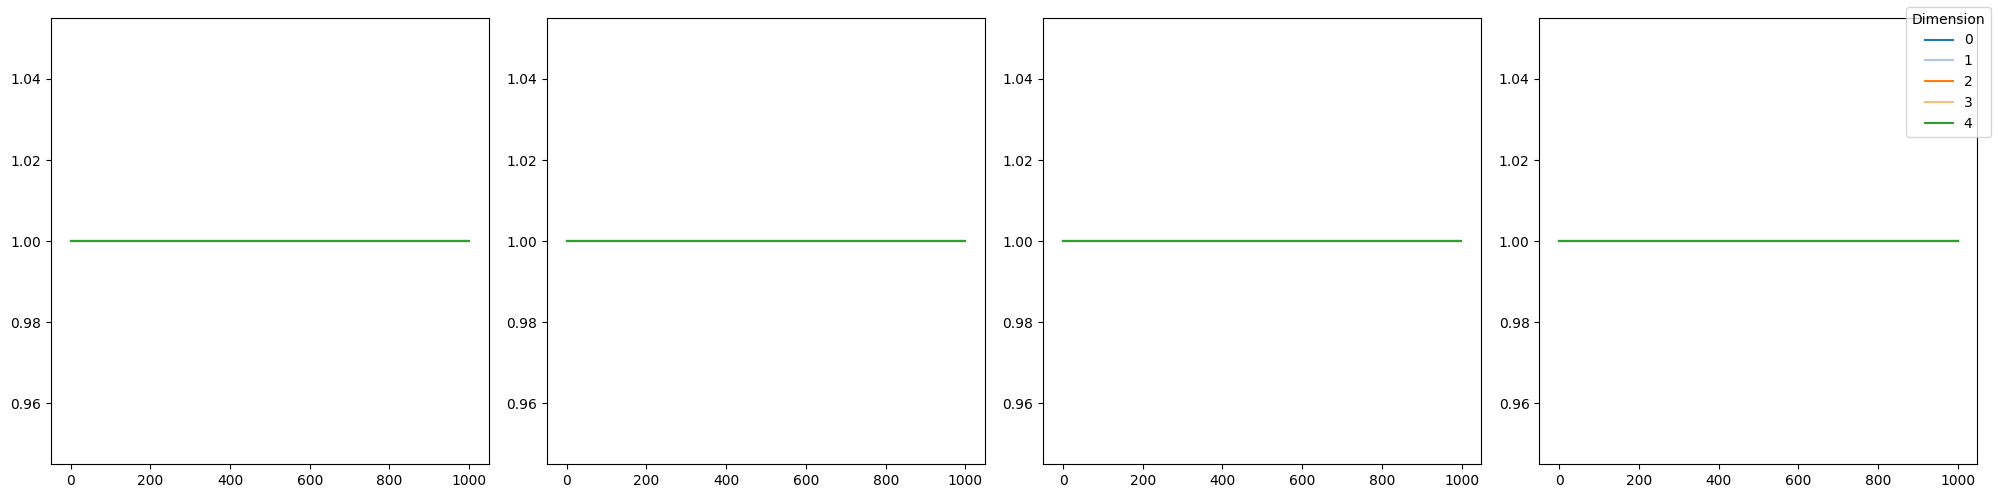

In [15]:
fig, ax = watcher.plot_values_time(
    x[0],
    # x_axis=x[0],
    project_heads=False,#tuple(torch.where(W_H.abs()[0] > 5)[0].numpy()),
    reduce_dims={0: 0},
    figsize=(20, 5),
)

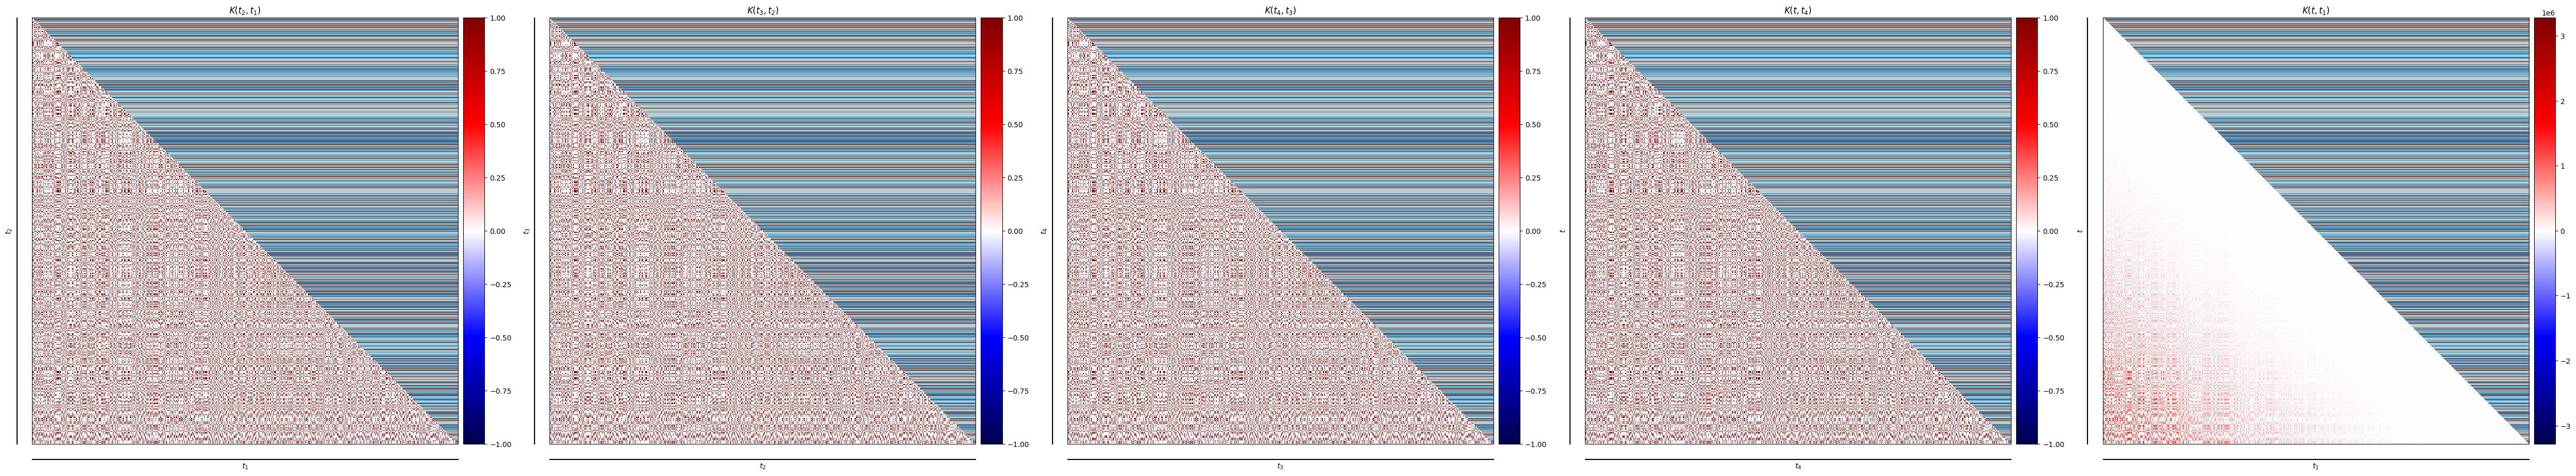

In [9]:
fig, ax = watcher.plot_attention_matrices(
    x[0],
    show_example=True,
    total=True,
    cmap="seismic",
    share_cmap=False,
    log_cmap=False,#(10, 1),
    causal_mask=True,
    only_kernels=None,
    project_heads=False,#tuple(torch.where(W_H.abs()[0] > 5)[0].numpy()),
    center_zero=True,
    cmap_example="tab20",
    figsize=(50, 10),
)
# fig.savefig(
#     f"attention_{model_id}.pdf",
#     facecolor=(0, 0, 0, 0),
#     bbox_inches="tight",
# )

In [11]:
watcher.model(x)

tensor([[[ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         ...,
         [ 0.0000e+00,  1.9535e-02],
         [ 0.0000e+00,  2.2608e-02],
         [ 0.0000e+00, -1.4822e-09]]], grad_fn=<UnsafeViewBackward0>)